# Mechine Learning - Logistic Regression

Importing Libraries

In [1]:
import pandas as pd # importing pandas
import matplotlib.pyplot as plt# importing matplotlib.pyplot
import seaborn as sns # importing seaborn
from sklearn.model_selection import train_test_split # importing train_test_split from model_selection of sklearn
from sklearn.linear_model import LogisticRegression # importing LogisticRegression from linear_model of sklearn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # importing confusion_matrix, classification_report, accuracy_score from metrics of sklearn

Reading file

In [2]:
df = pd.read_csv(r"Social_Network_Ads.csv") # reading files and strong in varibale `df`
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Getting basic info of data

In [3]:
df.dtypes # Checking Data Types

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [4]:
df.info() # Checking info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.shape # Checking Shape

(400, 5)

Checking is data clean or not

In [6]:
df.isnull().sum() # Checking null valuse and counting them

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.duplicated().sum() # Checking duplicate and calculating them

0

# Performing Basic EDA

In [8]:
round(df.describe(),1) # Getting Statsitical infrences

,User ID,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0,400.0
mean,15691539.8,37.7,69742.5,0.4
std,71658.3,10.5,34097.0,0.5
min,15566689.0,18.0,15000.0,0.0
25%,15626763.8,29.8,43000.0,0.0
50%,15694341.5,37.0,70000.0,0.0
75%,15750363.0,46.0,88000.0,1.0
max,15815236.0,60.0,150000.0,1.0


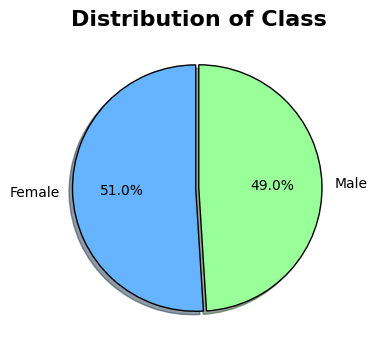

In [9]:
# Making Pie Chart of Gender according to the purchases

class_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'], shadow=True, explode=(0.025, 0),  wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Class', fontsize=16, fontweight='bold')
plt.show()


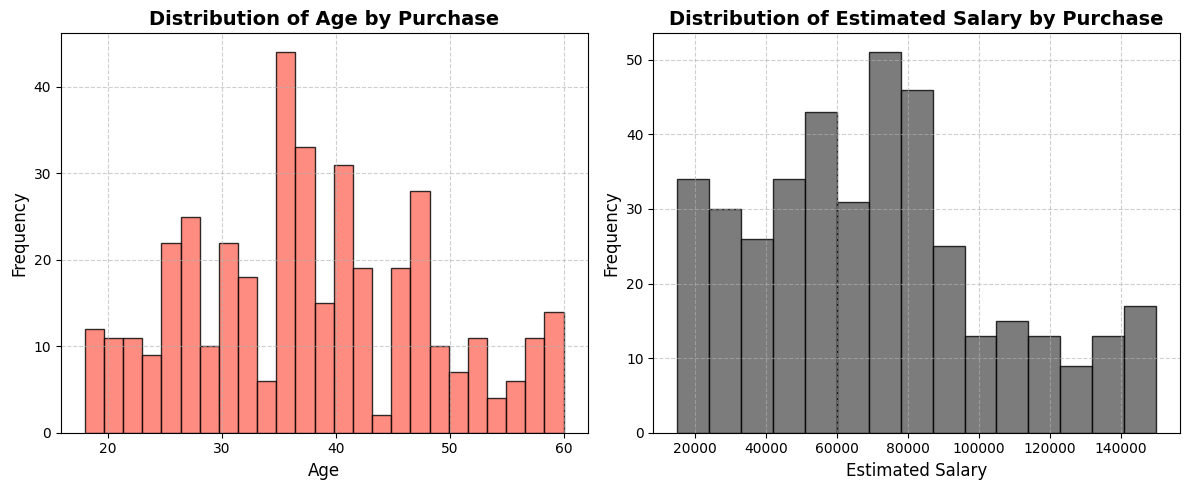

In [10]:
# making Hist plot of Age and Estimated Salary by purcahse

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # Subplot 1: Distribution of Age
plt.hist(df['Age'], bins=25, color='#ff6f61', edgecolor='black', alpha=0.8)
plt.title('Distribution of Age by Purchase', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  

plt.subplot(1, 2, 2) # Subplot 2: Distribution of Estimated Salary
plt.hist(df['EstimatedSalary'], bins=15, color='#5b5b5b', edgecolor='black', alpha=0.8)
plt.title('Distribution of Estimated Salary by Purchase', fontsize=14, fontweight='bold')
plt.xlabel('Estimated Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()


# Cleaning Data for Logistic Regression

#### Making modeing and acutally working on Assignment

In [11]:
df.drop(['User ID'], axis=1, inplace=True) # droping `UserID` and `Gendre` Since in Assingment it's aksed to make model with `Age` and `Estimaed Salary`.
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
df['Gender'].unique() # Getting unique values from 

array(['Male', 'Female'], dtype=object)

In [13]:
df['Gender'].value_counts() # just getting value count for nothing

Gender
Female    204
Male      196
Name: count, dtype: int64

In [14]:
pd.set_option('future.no_silent_downcasting', True)
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}) # replacing Male & Female with 1 & 0 respectively 

In [15]:
df['Gender'].value_counts() # just getting value count of 1 & 0 a match it with cell 12

Gender
0    204
1    196
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


#### Getting basic Statistical inference info of data

In [17]:
round(df.describe(),1) # Getting Statistical inference of data on which model will be applied

,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0
mean,37.7,69742.5,0.4
std,10.5,34097.0,0.5
min,18.0,15000.0,0.0
25%,29.8,43000.0,0.0
50%,37.0,70000.0,0.0
75%,46.0,88000.0,1.0
max,60.0,150000.0,1.0


In [18]:
round(df.corr(),5) # Getting corelation of data on which model will be applied

,Gender,Age,EstimatedSalary,Purchased
Gender,1.00000,-0.07374,-0.06043,-0.04247
Age,-0.07374,1.00000,0.15524,0.62245
EstimatedSalary,-0.06043,0.15524,1.00000,0.36208
Purchased,-0.04247,0.62245,0.36208,1.00000


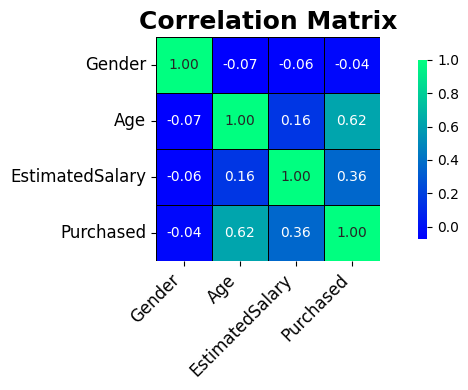

In [19]:
# Graphical image of corelational
correlation_matrix = df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='winter', fmt=".2f", linewidths=0.5, linecolor='black', cbar_kws={"shrink": .8}, square=True)
plt.title('Correlation Matrix', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

#### Wokring on Logistic Regression

In [20]:
x = df.iloc[:,0:1] # Selecting the first col (features), we can also duplicating first col in `x`
y = df.iloc[:,-1] # Selecting the last col (target). we can also duplicating first col in `y`

In [21]:
# Splitting the data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.70, random_state=101)

In [22]:
x_train.shape

(280, 1)

In [23]:
x_test.shape

(120, 1)

In [24]:
y_train.shape

(280,)

In [25]:
y_test.shape

(120,)

#### Making logistic Regression Model

In [26]:
model = LogisticRegression() # Training a logistic regression model
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_predict_train = model.predict(x_train) # Making predictions on the training and testing sets
y_predict_test = model.predict(x_test)

### Testing Model Accuracy

##### Confusion Matrix

In [28]:
print(confusion_matrix(y_train,y_predict_train)) # Printing the confusion matrix for the training set

[[177   0]
 [103   0]]


- True Negatives (177): 177 samples of class 0 (not purchased) were correctly classified.
- False Positives (0): No class 1 (purchased) samples were incorrectly classified as class 0.
- False Negatives (103): 103 samples of class 1 (purchased) were incorrectly classified as class 0.
- True Positives (0): No class 1 samples were correctly classified.

In [29]:
print(confusion_matrix(y_test,y_predict_test)) # Printing the confusion matrix for the test set

[[80  0]
 [40  0]]


- True Negatives (80): 80 samples of class 0 were correctly classified.
- False Positives (0): No class 1 samples were incorrectly classified as class 0.
- False Negatives (40): 40 samples of class 1 were incorrectly classified as class 0.
- True Positives (0): No class 1 samples were correctly classified.

##### Classification Report

In [30]:
# Set zero_division to 0 or 1 based on how you want to handle undefined precision

print(classification_report(y_train, y_predict_train, zero_division=0)) # Printing the classification report for the training set

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       177
           1       0.00      0.00      0.00       103

    accuracy                           0.63       280
   macro avg       0.32      0.50      0.39       280
weighted avg       0.40      0.63      0.49       280



- Precision for Class 0 (0.63): Out of all predicted class 0, 63% were correct.
- Recall for Class 0 (1.00): 100% of the actual class 0 samples were correctly classified.
- Precision for Class 1 (0.00): The model did not classify any class 1 samples correctly.
- Accuracy (0.63): The overall model accuracy is 63%, but it completely failed to predict class 1.

In [31]:
print(classification_report(y_test, y_predict_test, zero_division=0)) # Printing the classification report for the test set

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        80
           1       0.00      0.00      0.00        40

    accuracy                           0.67       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.44      0.67      0.53       120



- Precision for Class 0 (0.67): Out of all predicted class 0, 67% were correct.
- Recall for Class 1 (0.00): The model failed to classify any class 1 samples.
- Accuracy (0.67): The model has 67% accuracy, but it does not perform well in predicting class 1 (purchased).

##### Accuracy Score

In [32]:
print(accuracy_score(y_train,y_predict_train)) # Printing the accuracy score for the training set

0.6321428571428571


Training Accuracy (0.63): The model correctly predicted 63% of the training data, but it has a bias toward class 0.

In [33]:
print(accuracy_score(y_test,y_predict_test)) # Printing the accuracy score for the test set

0.6666666666666666


Test Accuracy (0.67): The model correctly predicted 67% of the test data, but it similarly fails to identify class 1.

# This model accuracy is 67% which is quiet low but we can increase this

### Lets drop Gender and do this all over again.

In [34]:
df.drop(['Gender'], axis=1, inplace=True) # droping `Gender`
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [35]:
round(df.describe(),1) # Getting Statsitical infrences of data on which model will be applied

,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0
mean,37.7,69742.5,0.4
std,10.5,34097.0,0.5
min,18.0,15000.0,0.0
25%,29.8,43000.0,0.0
50%,37.0,70000.0,0.0
75%,46.0,88000.0,1.0
max,60.0,150000.0,1.0


In [36]:
round(df.corr(),5) # Getting corelation of data on which model will be applied

,Age,EstimatedSalary,Purchased
Age,1.00000,0.15524,0.62245
EstimatedSalary,0.15524,1.00000,0.36208
Purchased,0.62245,0.36208,1.00000


In [37]:
round(df.corr(),5) # Getting corelation of data on which model will be applied

,Age,EstimatedSalary,Purchased
Age,1.00000,0.15524,0.62245
EstimatedSalary,0.15524,1.00000,0.36208
Purchased,0.62245,0.36208,1.00000


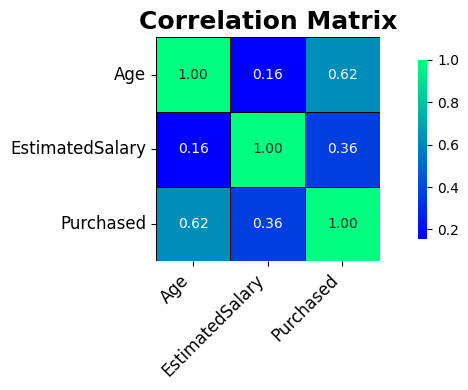

In [38]:
# Graphical image of corelational
correlation_matrix = df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='winter', fmt=".2f", linewidths=0.5, linecolor='black', cbar_kws={"shrink": .8}, square=True)
plt.title('Correlation Matrix', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

#### Wokring on Logistic Regression

In [39]:
x = df.iloc[:,0:1] # Selecting the first col (features), we can also duplicating first col in `x`
y = df.iloc[:,-1] # Selecting the last col (target). we can also duplicating first col in `y`

In [40]:
# Splitting the data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.70, random_state=101)

In [41]:
x_train.shape

(280, 1)

In [42]:
x_test.shape

(120, 1)

In [43]:
y_train.shape

(280,)

In [44]:
y_test.shape

(120,)

#### Making logistic Regression Model

In [45]:
model = LogisticRegression() # Training a logistic regression model
model.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_predict_train = model.predict(x_train) # Making predictions on the training and testing sets
y_predict_test = model.predict(x_test)

### Testing Model Accuracy

##### Confusion Matrix

In [47]:
print(confusion_matrix(y_train,y_predict_train)) # Printing the confusion matrix for the training set

[[164  13]
 [ 35  68]]


- True Negatives (164): 164 samples of class 0 (not purchased) were correctly classified.
- False Positives (13): 13 samples of class 0 were incorrectly classified as class 1.
- False Negatives (35): 35 samples of class 1 (purchased) were incorrectly classified as class 0.
- True Positives (68): 68 samples of class 1 were correctly classified.

In [48]:
print(confusion_matrix(y_test,y_predict_test)) # Printing the confusion matrix for the test set

[[75  5]
 [11 29]]


- True Negatives (75): 75 samples of class 0 were correctly classified.
- False Positives (5): 5 samples of class 0 were incorrectly classified as class 1.
- False Negatives (11): 11 samples of class 1 were incorrectly classified as class 0.
- True Positives (29): 29 samples of class 1 were correctly classified.

##### Classification Report

In [49]:
print(classification_report(y_train,y_predict_train)) # Printing the classification report for the training set

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       177
           1       0.84      0.66      0.74       103

    accuracy                           0.83       280
   macro avg       0.83      0.79      0.81       280
weighted avg       0.83      0.83      0.82       280



- Precision for Class 0 (0.82): 82% of the predicted class 0 samples were correct.
- Recall for Class 0 (0.93): 93% of the actual class 0 samples were correctly classified.
- Precision for Class 1 (0.84): 84% of the predicted class 1 samples were correct.
- Recall for Class 1 (0.66): 66% of the actual class 1 samples were correctly classified.
- Accuracy (0.83): The model correctly classified 83% of the training data.

In [50]:
print(classification_report(y_test,y_predict_test)) # Printing the classification report for the test set

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        80
           1       0.85      0.72      0.78        40

    accuracy                           0.87       120
   macro avg       0.86      0.83      0.84       120
weighted avg       0.87      0.87      0.86       120



- Precision for Class 0 (0.87): 87% of the predicted class 0 samples were correct.
- Recall for Class 0 (0.94): 94% of the actual class 0 samples were correctly classified.
- Precision for Class 1 (0.85): 85% of the predicted class 1 samples were correct.
- Recall for Class 1 (0.72): 72% of the actual class 1 samples were correctly classified.
- Accuracy (0.87): The model correctly classified 87% of the test data.

##### Accuracy Score

In [51]:
print(accuracy_score(y_train,y_predict_train)) # Printing the accuracy score for the training set

0.8285714285714286


Training Accuracy (0.83): The model correctly classified 82.9% of the training data.

In [52]:
print(accuracy_score(y_test,y_predict_test)) # Printing the accuracy score for the test set

0.8666666666666667


Test Accuracy (0.87): The model correctly classified 86.7% of the test data.

# Overall Interpretation:
- The model performs well on both training and test sets, with a balanced accuracy score of around 83-87%.
- Class 0 (not purchased) has slightly better recall and precision compared to Class 1 (purchased).
- The model generalizes well, maintaining similar performance on the test data, suggesting no overfitting.